# Capstone Project : Diabetes Prediction Model

**Overview**: In this final capstone project, we will try to develop an efficient AI/ML based model which is capable of predicting diabetes based on various input parameters.

## Focus areas: 

**Data inspection**

**Cleaning**

**Feature engineering**

**Statistical summaries**

**Visualizations**

**Correlation analysis**

### Import Required Libraries


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


### Load Dataset

In [2]:
df = pd.read_csv("data/Healthcare-Diabetes.csv")

print("First 5 Rows:")
print(df.head())

print("\nDataset Shape:")
print(df.shape)

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

First 5 Rows:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Shape:
(2768, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   I

### Check Missing Values

In [3]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
print("\n No Missing Values found!")


 No Missing Values found!


### Data Cleaning

In [5]:
cols_with_zero_issue = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_issue:
    df[col] = df[col].replace(0, np.nan)

print("\nMissing Values After Replacing Zeros:")
print(df.isnull().sum())

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Drop ID column if present
if "Id" in df.columns:
    df.drop("Id", axis=1, inplace=True)


Missing Values After Replacing Zeros:
Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


### Target Variable Analysis


Outcome Distribution:
Outcome
0    1816
1     952
Name: count, dtype: int64


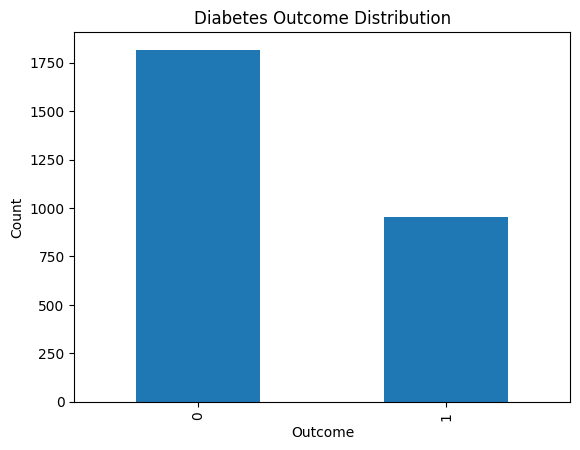

In [6]:
print("\nOutcome Distribution:")
print(df['Outcome'].value_counts())

plt.figure()
df['Outcome'].value_counts().plot(kind='bar')
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

### Univariate Analysis

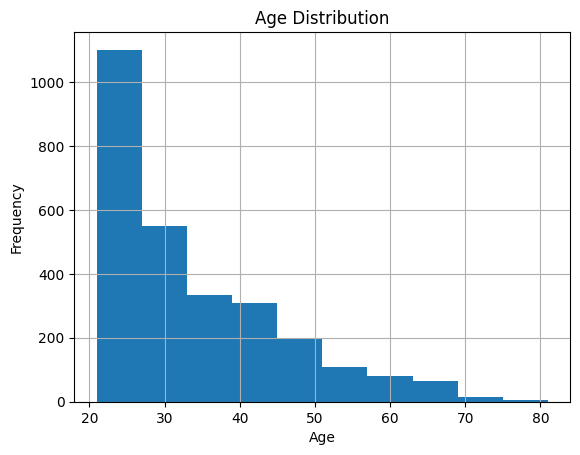

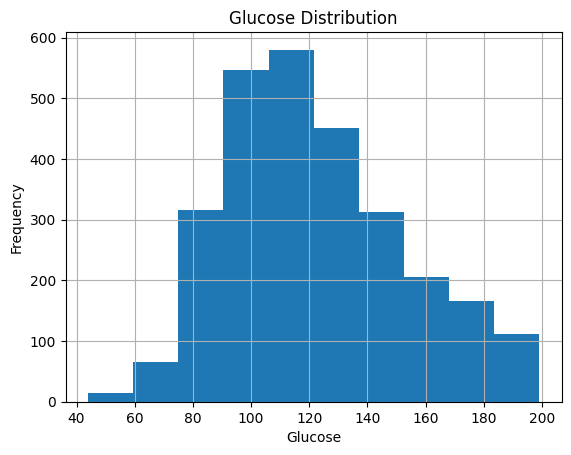

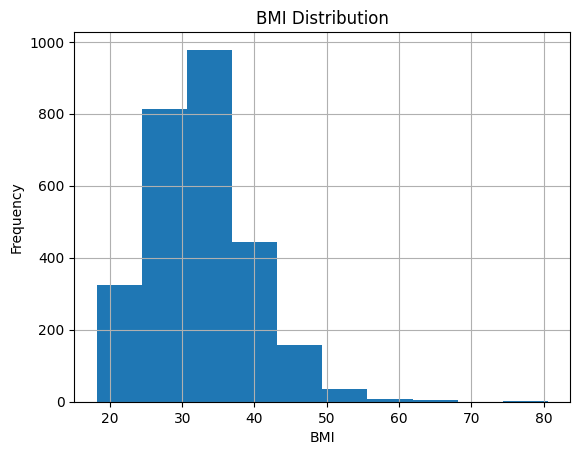

In [7]:
# Age Distribution
plt.figure()
df['Age'].hist()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Glucose Distribution
plt.figure()
df['Glucose'].hist()
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

# BMI Distribution
plt.figure()
df['BMI'].hist()
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

### Bivariate Analysis

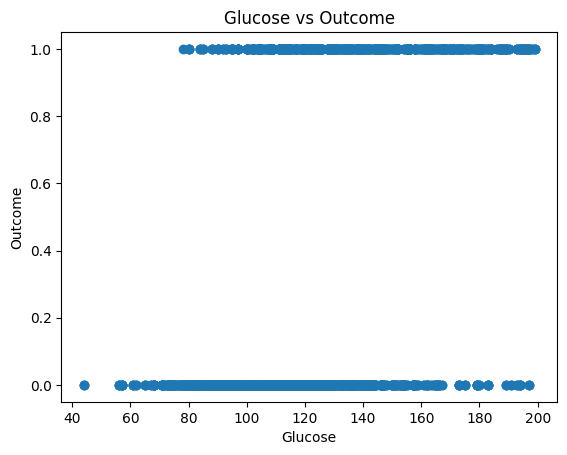

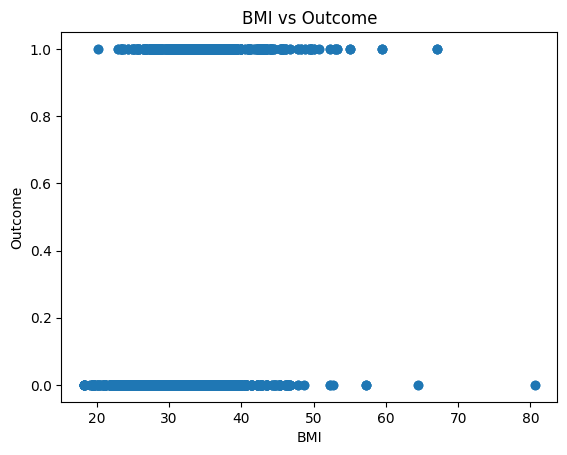

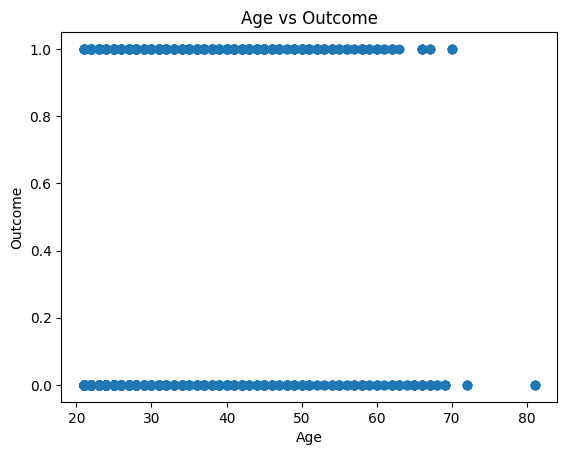

In [8]:
# Glucose vs Outcome
plt.figure()
plt.scatter(df['Glucose'], df['Outcome'])
plt.title("Glucose vs Outcome")
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.show()

# BMI vs Outcome
plt.figure()
plt.scatter(df['BMI'], df['Outcome'])
plt.title("BMI vs Outcome")
plt.xlabel("BMI")
plt.ylabel("Outcome")
plt.show()

# Age vs Outcome
plt.figure()
plt.scatter(df['Age'], df['Outcome'])
plt.title("Age vs Outcome")
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.show()


### Coorelation Analysis


Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.123436       0.201053       0.084142   
Glucose                      0.123436  1.000000       0.205145       0.203349   
BloodPressure                0.201053  0.205145       1.000000       0.198535   
SkinThickness                0.084142  0.203349       0.198535       1.000000   
Insulin                      0.025340  0.410528       0.047768       0.172661   
BMI                          0.013907  0.232277       0.265143       0.525719   
DiabetesPedigreeFunction    -0.027731  0.127984       0.008242       0.096492   
Age                          0.540805  0.261941       0.323998       0.128470   
Outcome                      0.223796  0.489074       0.171804       0.207343   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025340  0.013907                 -0.027731   
Glucose             

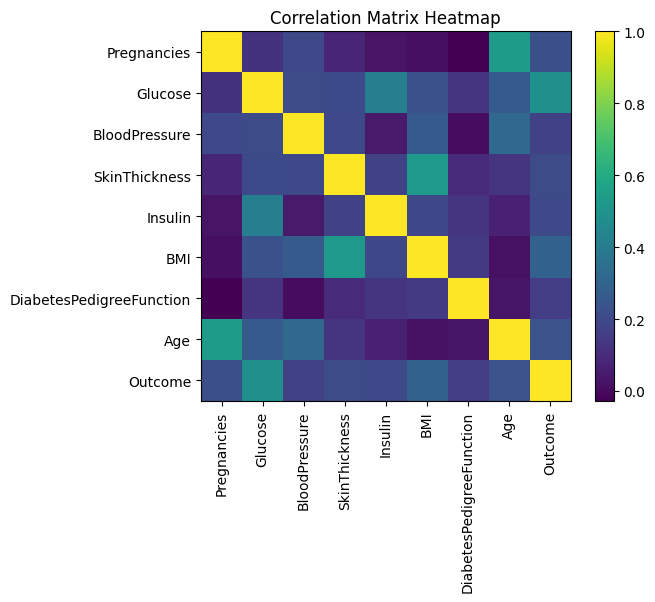

In [9]:
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visual Correlation Heatmap (matplotlib only)
plt.figure()
plt.imshow(corr_matrix)
plt.title("Correlation Matrix Heatmap")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()

### Simple Feature Engineering

In [10]:
# Create Age Group Feature
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[20,30,40,50,60,100], 
                        labels=['20-30','30-40','40-50','50-60','60+'])

print("\nDiabetes Rate by Age Group:")
print(df.groupby('AgeGroup')['Outcome'].mean())

# Create BMI Category
df['BMICategory'] = pd.cut(df['BMI'], 
                           bins=[0,18.5,25,30,100], 
                           labels=['Underweight','Normal','Overweight','Obese'])

print("\nDiabetes Rate by BMI Category:")
print(df.groupby('BMICategory')['Outcome'].mean())


Diabetes Rate by Age Group:
AgeGroup
20-30    0.212738
30-40    0.482143
40-50    0.574572
50-60    0.558824
60+      0.264151
Name: Outcome, dtype: float64

Diabetes Rate by BMI Category:
BMICategory
Underweight    0.000000
Normal         0.066489
Overweight     0.241641
Obese          0.446512
Name: Outcome, dtype: float64


C:\Users\kskap\AppData\Local\Temp\ipykernel_31664\2091756317.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Outcome'].mean())
C:\Users\kskap\AppData\Local\Temp\ipykernel_31664\2091756317.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('BMICategory')['Outcome'].mean())


### Outlier Check (Boxplots)

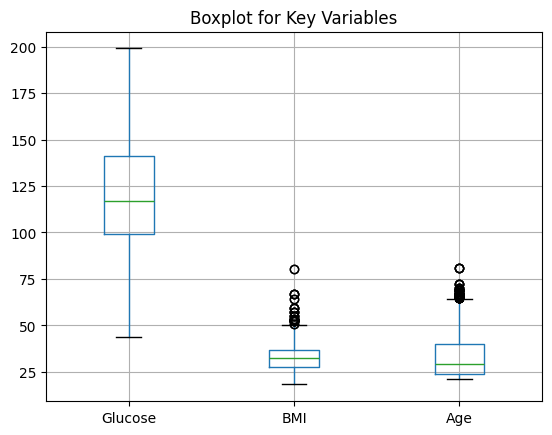

In [11]:
plt.figure()
df.boxplot(column=['Glucose', 'BMI', 'Age'])
plt.title("Boxplot for Key Variables")
plt.show()

## Below are some conlusive points after EDA step: 

- Glucose shows strongest correlation with diabetes
- BMI and Age show moderate positive relationship
- Dataset is moderately imbalanced as ~65% of records represent non-diabetic population while ~35% is diabetic, so this can bring some biasing while training the models.
- Older and obese individuals have higher diabetes prevalence
- Some medical variables required cleaning (zero replacement)

### Build X, y

In [26]:
df = df.drop(columns=['AgeGroup', 'BMICategory'], errors='ignore')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeGroup,BMICategory
0,6,148.0,72.0,35.0,126.0,33.6,0.627,50,40-50,Obese
1,1,85.0,66.0,29.0,126.0,26.6,0.351,31,30-40,Overweight
2,8,183.0,64.0,29.0,126.0,23.3,0.672,32,30-40,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,20-30,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,30-40,Obese
...,...,...,...,...,...,...,...,...,...,...
2763,2,75.0,64.0,24.0,55.0,29.7,0.370,33,30-40,Overweight
2764,8,179.0,72.0,42.0,130.0,32.7,0.719,36,30-40,Obese
2765,6,85.0,78.0,29.0,126.0,31.2,0.382,42,40-50,Obese
2766,0,129.0,110.0,46.0,130.0,67.1,0.319,26,20-30,Obese


### Create Train Test Split

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [17]:
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (2214, 10)
Test shape : (554, 10)


### Build a Simple Model

In [28]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)

dummy_pred = dummy_model.predict(X_test)

print("\n===== Dummy Baseline (Majority Class) =====")
print("Accuracy:", accuracy_score(y_test, dummy_pred))
print("\nClassification Report:\n", classification_report(y_test, dummy_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dummy_pred))


===== Dummy Baseline (Majority Class) =====
Accuracy: 0.6624548736462094

Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80       367
           1       0.00      0.00      0.00       187

    accuracy                           0.66       554
   macro avg       0.33      0.50      0.40       554
weighted avg       0.44      0.66      0.53       554


Confusion Matrix:
 [[367   0]
 [187   0]]


c:\Users\kskap\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kskap\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kskap\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

### Baselining Logistic Regression Model

In [29]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
log_probs = log_model.predict_proba(X_test)[:,1]

print("\n===== Logistic Regression Baseline =====")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("ROC AUC:", roc_auc_score(y_test, log_probs))
print("\nClassification Report:\n", classification_report(y_test, log_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_pred))


===== Logistic Regression Baseline =====
Accuracy: 0.759927797833935
ROC AUC: 0.831004385901004

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       367
           1       0.71      0.49      0.58       187

    accuracy                           0.76       554
   macro avg       0.74      0.69      0.71       554
weighted avg       0.75      0.76      0.75       554


Confusion Matrix:
 [[329  38]
 [ 95  92]]
